In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
df_raw=pd.read_csv("zomato.csv")

In [3]:
df_raw

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [4]:
df_cleaned=df_raw.drop(columns=['address','url','phone','menu_item','reviews_list','dish_liked'])

In [5]:
df_cleaned.shape

(51717, 11)

In [6]:
df_cleaned.name.value_counts().sum()

51717

In [7]:
df_cleaned.isnull().sum()

name                              0
online_order                      0
book_table                        0
rate                           7775
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     346
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [8]:
df_nonan=df_cleaned.dropna()

In [9]:
df_nonan.isna().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [10]:
df_nonan['rate'] = df_nonan['rate'].str.replace('/5', '', regex=False)

C:\Users\nkrdh\AppData\Local\Temp\ipykernel_22304\472133440.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nonan['rate'] = df_nonan['rate'].str.replace('/5', '', regex=False)


In [11]:
df_nonan.reset_index(inplace=True)

In [12]:
df_nonan.rate.value_counts().to_dict()

{'NEW': 2205,
 '3.9': 2091,
 '3.7': 2008,
 '3.8': 1999,
 '3.9 ': 1867,
 '3.8 ': 1820,
 '3.7 ': 1800,
 '3.6': 1754,
 '4.0': 1598,
 '4.0 ': 1547,
 '3.6 ': 1533,
 '4.1': 1471,
 '4.1 ': 1457,
 '3.5': 1424,
 '3.5 ': 1340,
 '3.4': 1250,
 '3.4 ': 1197,
 '3.3': 1152,
 '4.2 ': 1142,
 '3.3 ': 1125,
 '4.2': 1013,
 '3.2': 997,
 '4.3 ': 911,
 '3.1': 851,
 '3.2 ': 848,
 '4.3': 772,
 '3.1 ': 699,
 '4.4 ': 627,
 '3.0': 544,
 '4.4': 519,
 '3.0 ': 447,
 '2.9': 427,
 '4.5 ': 409,
 '2.9 ': 374,
 '2.8': 302,
 '2.8 ': 278,
 '4.5': 247,
 '4.6 ': 175,
 '2.7': 167,
 '2.6': 140,
 '2.7 ': 136,
 '4.6': 125,
 '2.6 ': 109,
 '4.7 ': 86,
 '4.7': 81,
 '-': 65,
 '2.5 ': 56,
 '2.5': 44,
 '4.8 ': 43,
 '2.4': 36,
 '4.9 ': 30,
 '2.4 ': 30,
 '2.3': 28,
 '4.9': 25,
 '2.3 ': 23,
 '4.8': 23,
 '2.2': 19,
 '2.1 ': 13,
 '2.1': 11,
 '2.2 ': 7,
 '2.0 ': 7,
 '2.0': 4,
 '1.8 ': 3,
 '1.8': 2}

In [13]:
(df_nonan['rate'] == 'NEW').sum()

2205

In [14]:
# Drop rows where 'rate' is '-' or 'NEW'
df_final = df_nonan[~df_nonan['rate'].isin(['-', 'NEW'])]

df_final.reset_index(drop=True, inplace=True)

In [15]:
df_final.head()

,index,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [16]:
df_final.isna().sum()

index                          0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [17]:
df_final.columns

Index(['index', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [18]:
df_final['approx_cost(for two people)'].unique

<bound method Series.unique of 0          800
1          800
2          800
3          300
4          600
         ...  
41258      800
41259      800
41260    1,500
41261    2,500
41262    1,500
Name: approx_cost(for two people), Length: 41263, dtype: object>

#### creating a approx cost (per person)

In [19]:
# Remove commas and convert to numeric
df_final['approx_cost(for two people)'] = df_cleaned['approx_cost(for two people)'].str.replace(',', '').astype(float)


C:\Users\nkrdh\AppData\Local\Temp\ipykernel_22304\2398633297.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['approx_cost(for two people)'] = df_cleaned['approx_cost(for two people)'].str.replace(',', '').astype(float)


In [20]:
df_final['approx_cost']=df_final['approx_cost(for two people)']/2
df_final.drop(columns='approx_cost(for two people)',inplace=True)

C:\Users\nkrdh\AppData\Local\Temp\ipykernel_22304\2093055531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['approx_cost']=df_final['approx_cost(for two people)']/2
C:\Users\nkrdh\AppData\Local\Temp\ipykernel_22304\2093055531.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.drop(columns='approx_cost(for two people)',inplace=True)


In [ ]:
# Columns to encode
columns_to_encode = ['online_order', 'book_table', 'location', 'rest_type', 'cuisines', 'listed_in(type)', 'listed_in(city)']

# Dictionary to store encoding mappings
encoding_mappings = {}
df_le = df_final.copy()
# Apply Label Encoding
label_encoders = {}
for col in columns_to_encode:
    le = LabelEncoder()
    df_le[col] = le.fit_transform(df_final[col])  # Transform the column
    label_encoders[col] = le
    encoding_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))  # Store mapping

# Display DataFrame after encoding

"
# Display encoding mappings
for col, mapping in encoding_mappings.items():
    print(f"\nMapping for {col}:")
    for category, encoded_value in mapping.items():
        print(f"  '{category}': {encoded_value}")

In [22]:
df_le.to_csv("df_le.csv", index=False)  # Saves without the index column


In [23]:
df_ml=df_le.drop(columns=['index','name'])

In [24]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
df_ml.shape

(41263, 10)

In [25]:
df_ml.dropna(inplace=True)

In [26]:
# Separate features and target
X = df_ml.drop(columns=['rate'])
y = df_ml['rate']

# Normalize numerical features (optional, but can improve results)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 0.1418919629873745
R-squared Score: 0.2777713775621772


In [27]:
from xgboost import XGBRegressor

# Train an XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - Mean Squared Error: {mse_xgb}")
print(f"XGBoost - R-squared Score: {r2_xgb}")


XGBoost - Mean Squared Error: 0.07642466574907303
XGBoost - R-squared Score: 0.6109992265701294


In [28]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Squared Error: {mse_rf}")
print(f"Random Forest - R-squared Score: {r2_rf}")


Random Forest - Mean Squared Error: 0.026520003853633674
Random Forest - R-squared Score: 0.8650134549765875


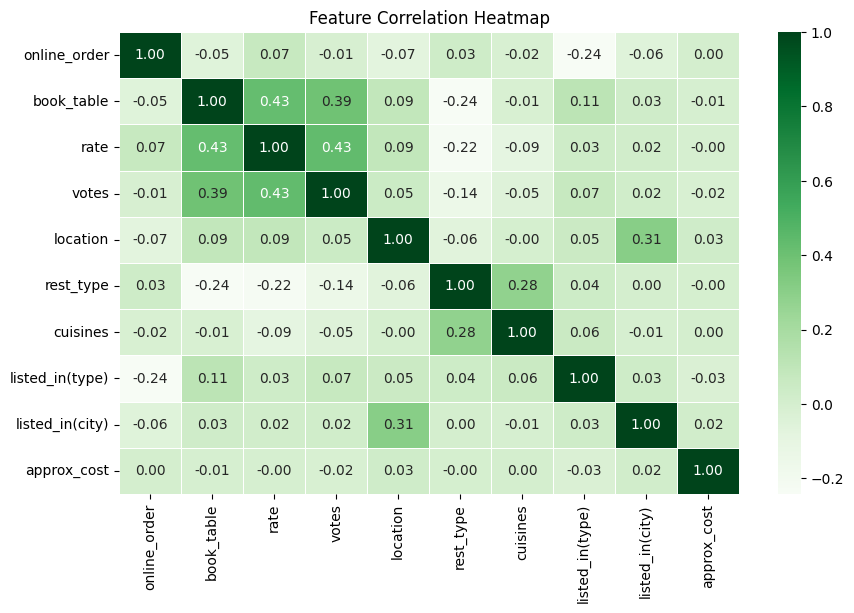

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df_ml.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="Greens", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


# After lasso feature selection


In [30]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df_ml.drop(columns=['rate'])
y = df_ml['rate']

# Standardize the features (important for Lasso)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Lasso Regression for Feature Selection
lasso = Lasso(alpha=0.01)  # Adjust alpha for regularization strength
lasso.fit(X_scaled, y)

# Get the selected features
selected_features = X.columns[lasso.coef_ != 0]  # Keep features with non-zero coefficients

print("Selected Features:", list(selected_features))


Selected Features: ['online_order', 'book_table', 'votes', 'location', 'rest_type', 'cuisines']


In [31]:
# Separate features and target
X = df_ml[selected_features]
y = df_ml['rate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
# Train an XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - Mean Squared Error: {mse_xgb}")
print(f"XGBoost - R-squared Score: {r2_xgb}")


XGBoost - Mean Squared Error: 0.07401268929243088
XGBoost - R-squared Score: 0.6232762336730957


In [33]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Squared Error: {mse_rf}")
print(f"Random Forest - R-squared Score: {r2_rf}")


Random Forest - Mean Squared Error: 0.016244623210520063
Random Forest - R-squared Score: 0.9173150360574028


In [40]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators= 269, max_depth= 50, min_samples_split= 2, min_samples_leaf= 1, max_features= 'sqrt')
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Squared Error: {mse_rf}")
print(f"Random Forest - R-squared Score: {r2_rf}")


Random Forest - Mean Squared Error: 0.014610494487901192
Random Forest - R-squared Score: 0.9256327343355507


# OPTUNA

In [ ]:
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# Define the objective function for optimization
def objective(trial):
    # Define hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    max_depth = trial.suggest_int('max_depth', 5, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)

    # Initialize the model with trial parameters
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    # Cross-validation score (neg MSE because Optuna maximizes objective)
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
    return score  # More negative means worse performance

# Run Optuna optimization
study = optuna.create_study(direction='maximize')  # Maximize negative MSE (minimizing MSE)
study.optimize(objective, n_trials=30)

# Best parameters
print("Best hyperparameters:", study.best_params)

# Train final model with best parameters
best_rf = RandomForestRegressor(**study.best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Evaluate model
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Optimized MSE: {mse:.4f}")


c:\Users\nkrdh\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-03-03 23:48:03,984] A new study created in memory with name: no-name-ad423548-8ca0-46ec-b1b1-005065710aa8
[I 2025-03-03 23:48:59,318] Trial 0 finished with value: -0.04557133291501511 and parameters: {'n_estimators': 186, 'max_depth': 14, 'min_samples_split': 14, 'min_samples_leaf': 4}. Best is trial 0 with value: -0.04557133291501511.
[I 2025-03-03 23:50:39,922] Trial 1 finished with value: -0.0693455900685589 and parameters: {'n_estimators': 482, 'max_depth': 10, 'min_samples_split': 4, 'min_samples_leaf': 7}. Best is trial 0 with value: -0.04557133291501511.
[I 2025-03-03 23:52:59,287] Trial 2 finished with value: -0.0444359580907784 and parameters: {'n_estimators': 437, 'max_depth': 46, 'min_samples_s

Best hyperparameters: {'n_estimators': 302, 'max_depth': 36, 'min_samples_split': 2, 'min_samples_leaf': 2}
Optimized MSE: 0.0205


In [39]:
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

# Define the objective function for optimization
def objective(trial):
    # Define hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    max_depth = trial.suggest_int('max_depth', 5, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    max_features = trial.suggest_categorical('max_features', [ 'sqrt', 'log2'])

    # Initialize the model with trial parameters
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42,
        n_jobs=-1  # Use all CPU cores
    )

    # Cross-validation score (R² score)
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='r2', n_jobs=-1).mean()
    return score  # Higher R² is better

# Run Optuna optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100, n_jobs=4)  # Use 4 CPU cores for parallel tuning

# Best parameters
print("Best hyperparameters:", study.best_params)

# Train final model with best parameters
best_rf = RandomForestRegressor(**study.best_params, random_state=42, n_jobs=-1)
best_rf.fit(X_train, y_train)

# Evaluate model
y_pred = best_rf.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"Optimized R² Score: {r2:.4f}")


[I 2025-03-04 00:49:17,692] A new study created in memory with name: no-name-f3e2b3e8-7312-4068-9e48-90217fb4de7a
[I 2025-03-04 00:49:27,130] Trial 0 finished with value: 0.7649515663564156 and parameters: {'n_estimators': 498, 'max_depth': 48, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.7649515663564156.
[I 2025-03-04 00:49:27,242] Trial 3 finished with value: 0.6059567089859599 and parameters: {'n_estimators': 123, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 0 with value: 0.7649515663564156.
[I 2025-03-04 00:49:27,628] Trial 1 finished with value: 0.6737698035353451 and parameters: {'n_estimators': 314, 'max_depth': 15, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 0 with value: 0.7649515663564156.
[I 2025-03-04 00:49:29,327] Trial 2 finished with value: 0.6025227934193013 and parameters: {'n_estimators': 210, 'max_depth': 10,

Best hyperparameters: {'n_estimators': 269, 'max_depth': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
Optimized R² Score: 0.9259
